In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
cd /content/drive/MyDrive/Colab Notebooks/short/practicals-main/DL3

/content/drive/MyDrive/Colab Notebooks/short/practicals-main/DL3


In [62]:
import pandas as pd

In [63]:
df = pd.read_csv('fashion-mnist_train.csv')

In [64]:
df_x = df.drop(['label'],axis=1)

In [65]:
df_y = df['label']

In [66]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(df_x,df_y,test_size=0.3,random_state=123)

In [69]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(42000, 784)
(18000, 784)
(42000,)
(18000,)


In [70]:
x_train = x_train.to_numpy().reshape(42000,28,28,1)
x_test = x_test.to_numpy().reshape(18000,28,28,1)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

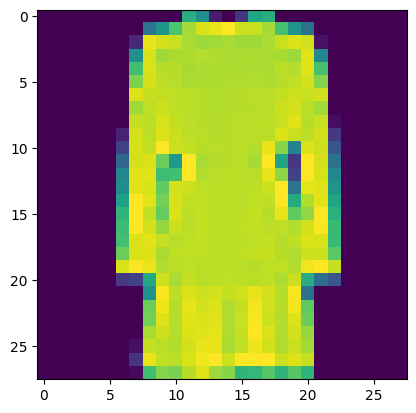

In [72]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0])

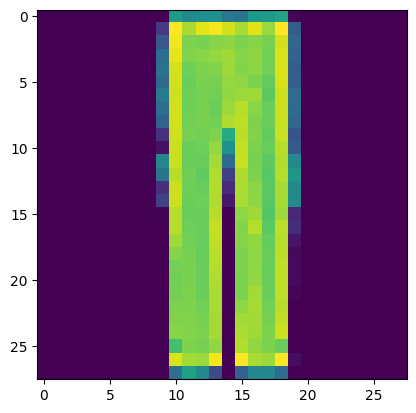

In [73]:
plt.imshow(x_train[1])

In [74]:
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [75]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(28,3,3,input_shape=(28,28,1),activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(64,activation='sigmoid')
])

model.compile(
    optimizer = 'adam',
    loss='sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [76]:
history = model.fit(
    x_train,
    y_train,
    epochs=12,
    batch_size = 50,
    validation_data=(x_test,y_test)
)

Epoch 1/12
840/840 [==============================] - 10s 10ms/step - loss: 0.7701 - accuracy: 0.7359 - val_loss: 0.5335 - val_accuracy: 0.8021
Epoch 2/12
840/840 [==============================] - 11s 13ms/step - loss: 0.4858 - accuracy: 0.8228 - val_loss: 0.4533 - val_accuracy: 0.8337
Epoch 3/12
840/840 [==============================] - 6s 8ms/step - loss: 0.4422 - accuracy: 0.8378 - val_loss: 0.4288 - val_accuracy: 0.8436
Epoch 4/12
840/840 [==============================] - 8s 9ms/step - loss: 0.4176 - accuracy: 0.8464 - val_loss: 0.4117 - val_accuracy: 0.8463
Epoch 5/12
840/840 [==============================] - 7s 8ms/step - loss: 0.3976 - accuracy: 0.8558 - val_loss: 0.4046 - val_accuracy: 0.8483
Epoch 6/12
840/840 [==============================] - 8s 9ms/step - loss: 0.3819 - accuracy: 0.8614 - val_loss: 0.3945 - val_accuracy: 0.8521
Epoch 7/12
840/840 [==============================] - 6s 8ms/step - loss: 0.3697 - accuracy: 0.8635 - val_loss: 0.3889 - val_accuracy: 0.8554
Ep

<Axes: title={'center': 'Loss curves'}, xlabel='Epochs', ylabel='loss'>

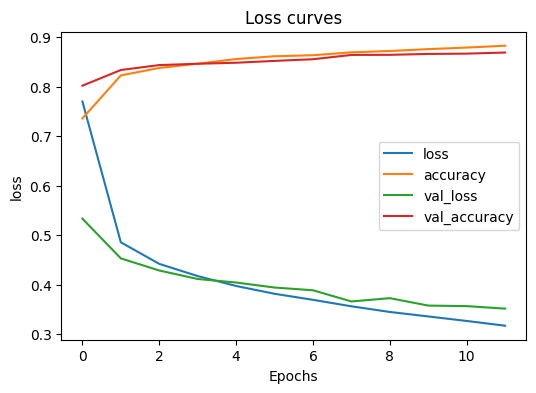

In [77]:
pd.DataFrame(history.history).plot(figsize=(6,4),xlabel="Epochs",ylabel="loss", title='Loss curves')

In [78]:
import numpy as np
y_pred = np.argmax(cnn_model.predict(x_test),axis=-1)

563/563 [==============================] - 1s 2ms/step


In [79]:
df_output = pd.DataFrame()
df_output['y_test'] = pd.DataFrame(y_test)
df_output['y_pred'] = pd.DataFrame(y_pred)
df_output.head()

,y_test,y_pred
0,2,2
1,6,4
2,1,1
3,0,0
4,2,4


In [80]:
import sklearn
sklearn.metrics.accuracy_score(y_test,y_pred)

0.8837777777777778